In [2]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

<h2> data clean-up

In [3]:
df = pd.read_csv('../data/208_data.csv',sep=';')
print(len(df))
df.head()

746


,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,67.900 kr.,2014,108000,2014-08-12,Benzin,22.2,82,M,2610
1,59.500 kr.,2015,224000,2015-04-09,Diesel,33.3,100,M,6270
2,139.900 kr.,2017,58000,2018-01-09,Diesel,28.6,100,M,3400
3,199.900 kr.,2021,26000,2021-05-21,Benzin,22.8,100,M,2610
4,75.999 kr.,2013,169000,2012-11-20,Diesel,26.3,68,M,7100


In [4]:
#Cleans price and first regestration
df['price'] = df['price'].str.replace(r'\D','',regex=True)
df['price'] = df['price'].astype('int64')
df['reg'] = df['reg'].str.split('-').str[0]
df['reg'] = df['reg'].astype('int64')
df

,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,67900,2014,108000,2014,Benzin,22.2,82,M,2610
1,59500,2015,224000,2015,Diesel,33.3,100,M,6270
2,139900,2017,58000,2018,Diesel,28.6,100,M,3400
3,199900,2021,26000,2021,Benzin,22.8,100,M,2610
4,75999,2013,169000,2012,Diesel,26.3,68,M,7100
...,...,...,...,...,...,...,...,...,...
741,224800,2021,9347,2021,Benzin,22.8,100,M,7400
742,224900,2021,30000,2021,Benzin,22.0,100,A,7000
743,224800,2021,5000,2021,Benzin,22.8,100,M,7400
744,224800,2021,8529,2021,Benzin,22.8,100,M,7400


In [5]:
#converts categorical variable into dummy/indicator variables
df = pd.get_dummies(df, columns = ['gear_type','fuel_type'])
df

,price,model_year,km,reg,fuel_economy,horse_power,zip_code,gear_type_A,gear_type_M,fuel_type_Benzin,fuel_type_Diesel
0,67900,2014,108000,2014,22.2,82,2610,0,1,1,0
1,59500,2015,224000,2015,33.3,100,6270,0,1,0,1
2,139900,2017,58000,2018,28.6,100,3400,0,1,0,1
3,199900,2021,26000,2021,22.8,100,2610,0,1,1,0
4,75999,2013,169000,2012,26.3,68,7100,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
741,224800,2021,9347,2021,22.8,100,7400,0,1,1,0
742,224900,2021,30000,2021,22.0,100,7000,1,0,1,0
743,224800,2021,5000,2021,22.8,100,7400,0,1,1,0
744,224800,2021,8529,2021,22.8,100,7400,0,1,1,0


In [6]:
#selects target and features
X = df[['model_year', 'km','reg','fuel_economy','horse_power','gear_type_A','gear_type_M','fuel_type_Benzin','fuel_type_Diesel']]
y = df['price']

In [7]:
#Test train split of data, 33% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

<h2> Linear Regression model

In [8]:
#fits model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

#degree of linear correlation between data and target
print(f'Regression score: {regr.score(X_train,y_train)}')

Regression score: 0.885977618159934


In [9]:
#Test of 5 cars
print(f'Car 1: Predicted price: {regr.predict(X_test[0:1])[0].round(2)}kr - actual price: {y_test[0:1].values[0]}kr')
print(f'Car 2: Predicted price: {regr.predict(X_test[1:2])[0].round(2)}kr - actual price: {y_test[1:2].values[0]}kr')
print(f'Car 3: Predicted price: {regr.predict(X_test[2:3])[0].round(2)}kr - actual price: {y_test[2:3].values[0]}kr')
print(f'Car 4: Predicted price: {regr.predict(X_test[3:4])[0].round(2)}kr - actual price: {y_test[3:4].values[0]}kr')
print(f'Car 5: Predicted price: {regr.predict(X_test[4:5])[0].round(2)}kr - actual price: {y_test[4:5].values[0]}kr')

Car 1: Predicted price: 93880.88kr - actual price: 99990kr
Car 2: Predicted price: 115435.15kr - actual price: 104900kr
Car 3: Predicted price: 121114.23kr - actual price: 119800kr
Car 4: Predicted price: 115961.69kr - actual price: 104900kr
Car 5: Predicted price: 32490.67kr - actual price: 45000kr


In [10]:
#Method to get prediction score
def get_prediction_score(target,pred_target):
    score_list = []
    for num1,num2 in zip(target,pred_target):
        if num1 > num2:
            score_list.append(num2/num1*100)
        elif num2 > num1:
            score_list.append(num1/num2*100)
        else:
            score_list.append(100)
    return sum(score_list) / len(score_list)

In [11]:
#Test of prediction score
y_pred = regr.predict(X_test)
get_prediction_score(y_test,y_pred)

88.79805308282666

<h2> Decision tree regressor

In [12]:
#Fit and model score
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
#predictions = model.predict(X_test)
dtr.score(X_test, y_test)

0.9315920706751435

In [13]:
#Test of 5 cars
print(f'Car 1: Predicted price: {dtr.predict(X_test[0:1])[0].round(2)}kr - actual price: {y_test[0:1].values[0]}kr')
print(f'Car 2: Predicted price: {dtr.predict(X_test[1:2])[0].round(2)}kr - actual price: {y_test[1:2].values[0]}kr')
print(f'Car 3: Predicted price: {dtr.predict(X_test[2:3])[0].round(2)}kr - actual price: {y_test[2:3].values[0]}kr')
print(f'Car 4: Predicted price: {dtr.predict(X_test[3:4])[0].round(2)}kr - actual price: {y_test[3:4].values[0]}kr')
print(f'Car 5: Predicted price: {dtr.predict(X_test[4:5])[0].round(2)}kr - actual price: {y_test[4:5].values[0]}kr')

Car 1: Predicted price: 84800.0kr - actual price: 99990kr
Car 2: Predicted price: 109400.0kr - actual price: 104900kr
Car 3: Predicted price: 109800.0kr - actual price: 119800kr
Car 4: Predicted price: 109400.0kr - actual price: 104900kr
Car 5: Predicted price: 55000.0kr - actual price: 45000kr


In [14]:
#Test of prediction score
y_pred = dtr.predict(X_test)
get_prediction_score(y_test,y_pred)

91.0282331183268

<h1>data visualization

,price,model_year,km,reg,fuel_economy,horse_power,zip_code,gear_type_A,gear_type_M,fuel_type_Benzin,fuel_type_Diesel
price,1.000000,0.888957,-0.785115,0.895827,-0.056102,0.355577,0.000030,0.246528,-0.246528,0.171588,-0.171588
model_year,0.888957,1.000000,-0.698258,0.992883,0.063074,0.351627,0.033164,0.089103,-0.089103,0.079769,-0.079769
km,-0.785115,-0.698258,1.000000,-0.705731,0.226550,-0.109538,0.077614,-0.108343,0.108343,-0.348780,0.348780
reg,0.895827,0.992883,-0.705731,1.000000,0.047831,0.345025,0.020505,0.097475,-0.097475,0.098203,-0.098203
fuel_economy,-0.056102,0.063074,0.226550,0.047831,1.000000,0.554155,0.178564,-0.157759,0.157759,-0.939563,0.939563
horse_power,0.355577,0.351627,-0.109538,0.345025,0.554155,1.000000,0.063576,0.024308,-0.024308,-0.507336,0.507336
zip_code,0.000030,0.033164,0.077614,0.020505,0.178564,0.063576,1.000000,-0.000047,0.000047,-0.208673,0.208673
gear_type_A,0.246528,0.089103,-0.108343,0.097475,-0.157759,0.024308,-0.000047,1.000000,-1.000000,0.145630,-0.145630
gear_type_M,-0.246528,-0.089103,0.108343,-0.097475,0.157759,-0.024308,0.000047,-1.000000,1.000000,-0.145630,0.145630
fuel_type_Benzin,0.171588,0.079769,-0.348780,0.098203,-0.939563,-0.507336,-0.208673,0.145630,-0.145630,1.000000,-1.000000


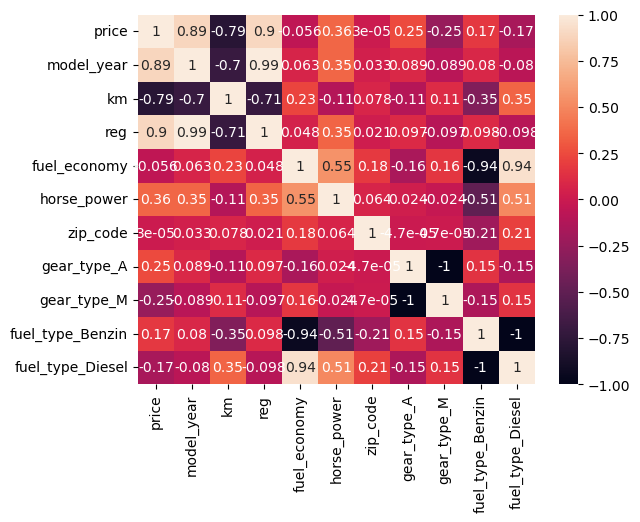

In [15]:
#Heatmap to show correlation between target and feautres
sns.heatmap(df.corr(), annot=True)
df.corr()

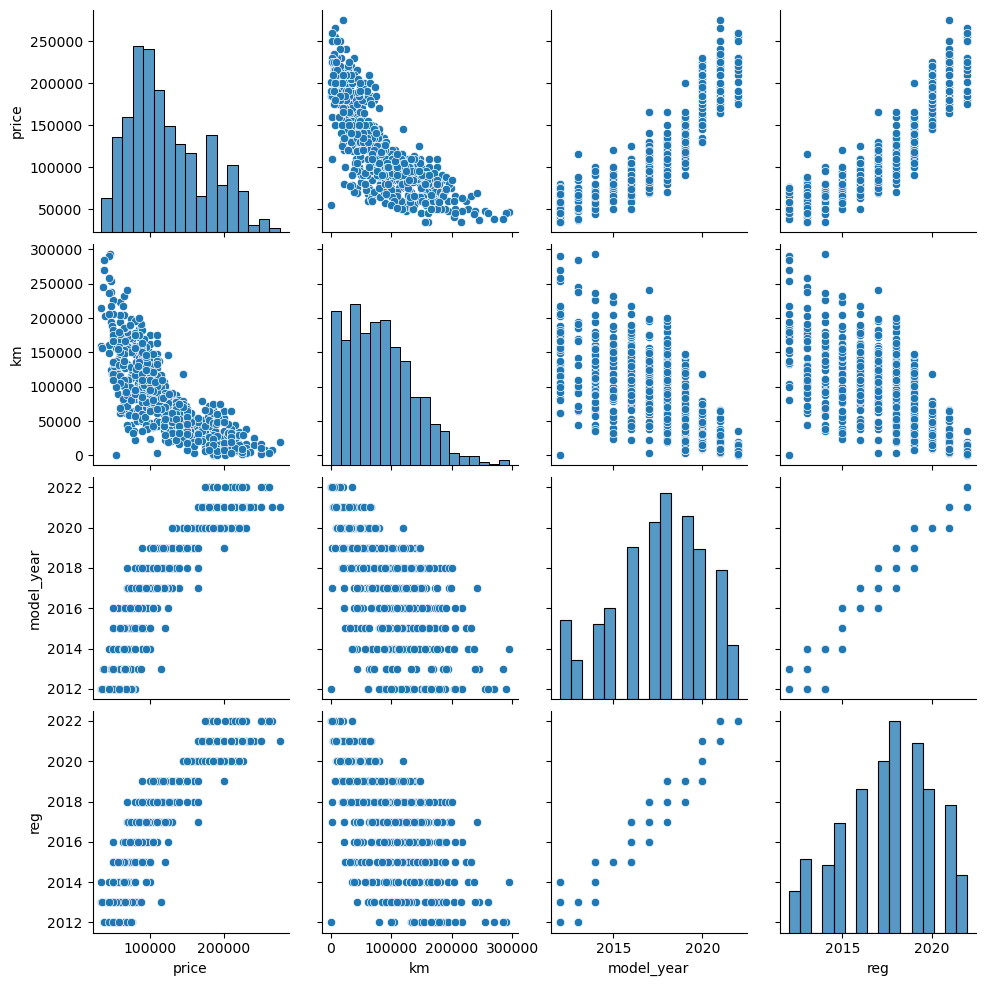

In [16]:
#Plots
sns.pairplot(df[['price','km','model_year','reg']])

<AxesSubplot:xlabel='price', ylabel='km'>

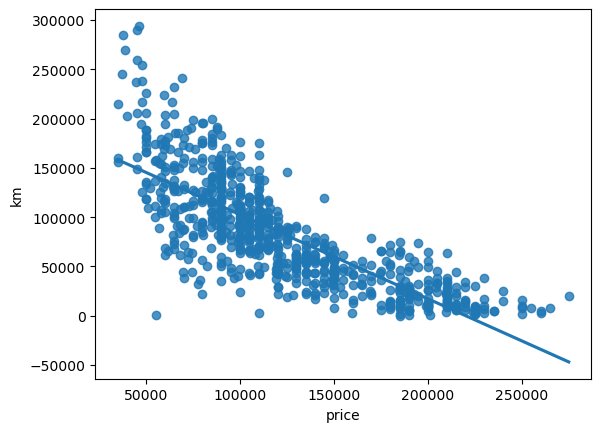

In [17]:
#regplot with price and model year
sns.regplot(x=df['price'], y=df['km'], ci=None)

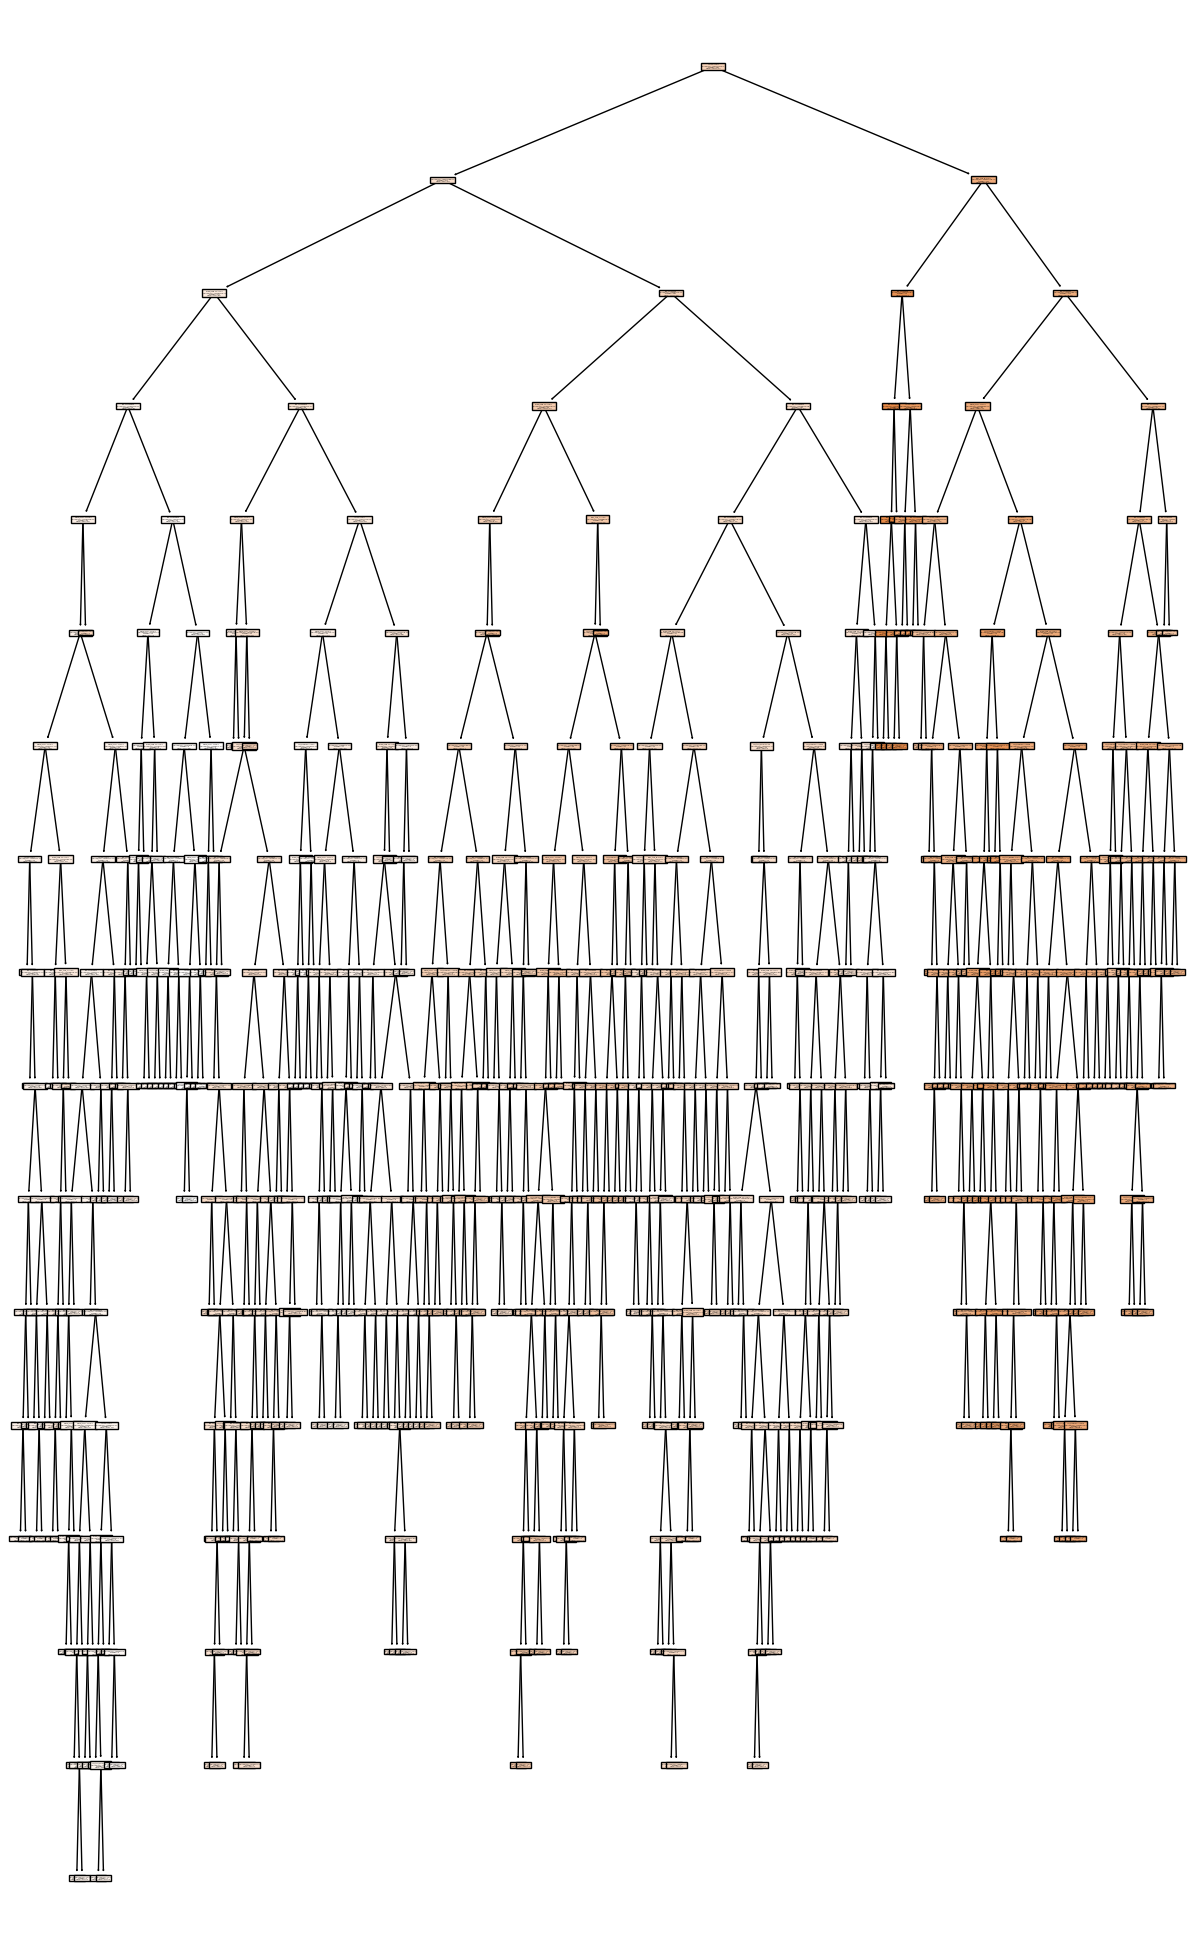

In [18]:
#map of the descision tree
fig = plt.figure(figsize=(15,25))
_= tree.plot_tree(dtr, feature_names=X.columns, filled=True)